In [1]:
import torch
import numpy as np
from hysteresis.base import TorchHysteresis
from hysteresis.training import train_torch
from hysteresis.visualization import plot_hysteresis_density
import matplotlib.pyplot as plt

In [2]:
from hysteresis.meshing import exponential_mesh

fname = '../facet_ii_data/quadrupoles/quad_m1-34.ru1'
data = []
with open(fname,'r') as f:
    f.readline()
    for line in f:
        temp = line.rstrip().split(' ')
        d = []
        for ele in temp:
            if ele != '':
                d += [ele]
        data += [d]
data = np.asfarray(data)
data[:, 1] = data[:, 1] / np.max(data[:, 1])
data[:, 3] = data[:, 3] * np.where(data[:,7] < 0, -1, 1)

# get real h, m
h = torch.tensor(data[:,1]).double()
m = torch.tensor(data[:,3]).double()

# normalize m
m = (m - min(m)) / (max(m) - min(m))

def mesh_dens(x, y, scale):
    return exponential_mesh(x, y, scale, min_density=0.01)

calculated 25 states
293
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
tensor(1.9471e-06, dtype=torch.float64)
Parameter containing:
tensor([0.4999], dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor([0.5809], dtype=torch.float64, requires_grad=True)


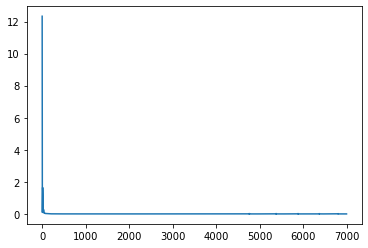

In [3]:
# fit using normal hysteresis model
H = TorchHysteresis(h, mesh_scale = 0.1, mesh_density_function=mesh_dens)
print(len(H.mesh_points))

# train on data
loss_trace = train_torch(H, m, 7000, lr=0.1)
fig, ax = plt.subplots()
ax.plot(loss_trace)
print(loss_trace[-1])
print(H.offset)
print(H.scale)

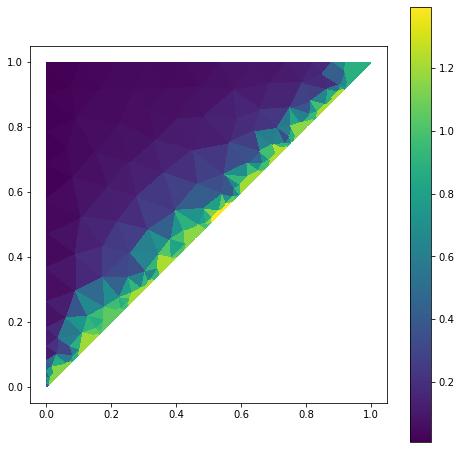

In [4]:
fig, ax = plot_hysteresis_density(H)
ax.set_aspect('equal')
fig.set_size_inches(8,8)

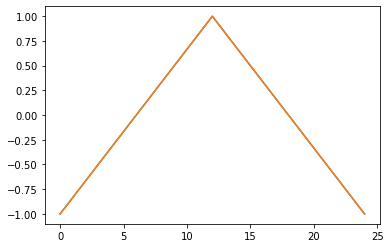

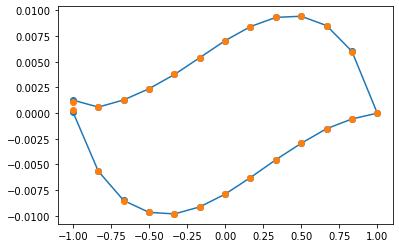

In [5]:
t = torch.linspace(0, 2*np.pi, 25)
h_test = - torch.cos(t)
h_test = h
plt.plot(h)
plt.plot(h_test)

def fit(x):
    return x/2.0 + 0.5

fig, ax = plt.subplots()
m_pred = H.predict_magnetization(h_test)
ax.plot(h_test, m_pred.detach() - fit(h_test),'o-')
ax.plot(h, m - fit(h),'o')

In [6]:
print(H.offset)
print(H.scale)

Parameter containing:
tensor([0.4999], dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor([0.5809], dtype=torch.float64, requires_grad=True)
